In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-data/Real estate.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [3]:
# Load the dataset
df_realestate = pd.read_csv("/kaggle/input/real-estate-data/Real estate.csv")
print(df_realestate.head())
print(df_realestate.describe())
print(df_realestate.info())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [4]:
# Drop unnamed index column
# df_realestate = df_realestate.drop(columns=["No"])

In [5]:
# Select features and target
feature_cols = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
                'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
target_col = 'Y house price of unit area'

# Normalize function
def normalize(array):
    return (array - np.mean(array, axis=0)) / np.std(array, axis=0)

# Prepare data
X_raw = df_realestate[feature_cols].values
y_raw = df_realestate[target_col].values

X = normalize(X_raw)
y = normalize(y_raw)

m, n = X.shape

In [6]:
# Hypothesis function for multivariate
def hyp(theta, X):
    return theta[0] + np.dot(X, theta[1:])

# Cost function
def cost(theta, X, y):
    return np.sum((hyp(theta, X) - y) ** 2) / (2 * len(y))

# Derivatives
def der0(theta, X, y):
    return np.sum(hyp(theta, X) - y) / len(y)

def deri(theta, X, y, i):
    return np.sum((hyp(theta, X) - y) * X[:, i]) / len(y)

# Gradient Descent for Multivariate Linear Regression
def gradient_descent(X, y, alpha=0.01, loops=10000):
    theta = [0.0] * (X.shape[1] + 1)
    for _ in range(loops):
        temp0 = theta[0] - alpha * der0(theta, X, y)
        temp_rest = [theta[i+1] - alpha * deri(theta, X, y, i) for i in range(X.shape[1])]
        theta = [temp0] + temp_rest
    return theta

# R² Score function
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

In [7]:
# Train the model
theta = gradient_descent(X, y, alpha=0.01, loops=10000)

# Predict and evaluate
y_pred = hyp(theta, X)
final_cost = cost(theta, X, y)
r2 = r2_score(y, y_pred)

In [8]:
# Output results
print("=== Multivariate Linear Regression Results ===")
print(f"Final Cost: {final_cost:.4f}")
print(f"R² Score: {r2:.4f}\n")

print("Feature Coefficients:")
print(f"Intercept (theta0): {theta[0]:.4f}")
for i, feature in enumerate(feature_cols):
    print(f"{feature}: theta{i+1} = {theta[i+1]:.4f}")

=== Multivariate Linear Regression Results ===
Final Cost: 0.2088
R² Score: 0.5824

Feature Coefficients:
Intercept (theta0): -0.0000
X1 transaction date: theta1 = 0.1066
X2 house age: theta2 = -0.2258
X3 distance to the nearest MRT station: theta3 = -0.4162
X4 number of convenience stores: theta4 = 0.2453
X5 latitude: theta5 = 0.2056
X6 longitude: theta6 = -0.0140



=== Feature Influence Ranking ===
X3 distance to the nearest MRT station: theta = -0.4162
X4 number of convenience stores: theta = 0.2453
X2 house age: theta = -0.2258
X5 latitude: theta = 0.2056
X1 transaction date: theta = 0.1066
X6 longitude: theta = -0.0140


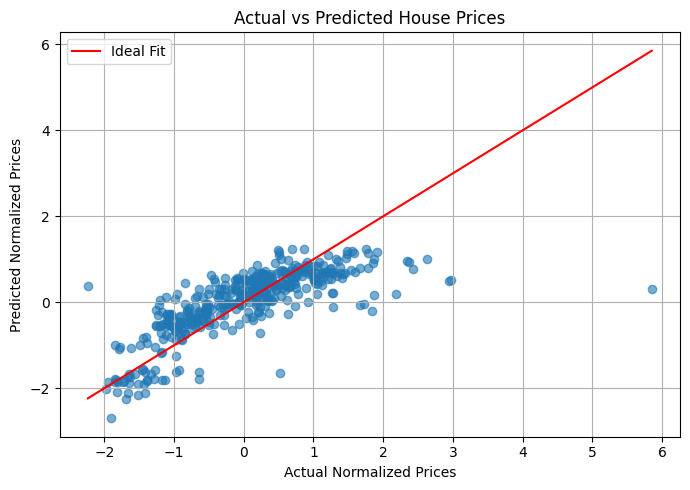

In [9]:
# Rank by absolute theta value (excluding intercept)
print("\n=== Feature Influence Ranking ===")
theta_feature = list(zip(feature_cols, theta[1:]))
theta_feature.sort(key=lambda x: abs(x[1]), reverse=True)
for name, val in theta_feature:
    print(f"{name}: theta = {val:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(7, 5))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Ideal Fit')
plt.xlabel("Actual Normalized Prices")
plt.ylabel("Predicted Normalized Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
print("\n=== R² Score for Each Individual Feature ===")
for i, feature in enumerate(feature_cols):
    Xi = X[:, i].reshape(-1, 1)  # Use only one feature
    theta_i = gradient_descent(Xi, y, alpha=0.01, loops=10000)
    y_pred_i = hyp(theta_i, Xi)
    r2_i = r2_score(y, y_pred_i)
    print(f"{feature}: R² = {r2_i:.4f}")


=== R² Score for Each Individual Feature ===
X1 transaction date: R² = 0.0077
X2 house age: R² = 0.0443
X3 distance to the nearest MRT station: R² = 0.4538
X4 number of convenience stores: R² = 0.3260
X5 latitude: R² = 0.2985
X6 longitude: R² = 0.2738
